# Feature Engineering for NLP in Python

## Basic features and readability scores

In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv('russian_tweets.csv')

In [4]:
tweets.head()

,Unnamed: 0,content,char_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138
2,226970,.@vfpatlas well that's a swella word there (di...,65
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139
4,161610,Жители обстреливаемых районов Донецка проводят...,131


In [3]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

In [5]:
ted = pd.read_csv('ted.csv')

In [6]:
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [7]:
# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


In [12]:
import matplotlib.pyplot as plt

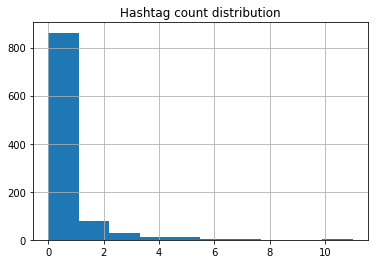

In [13]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

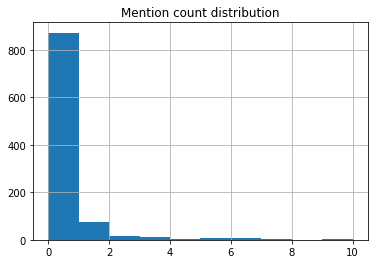

In [14]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

Flesch reading ease measures how complex a text is. **The lower the score, the more difficult the text is to read**. The Flesch readability score uses the average length of your sentences (measured by the number of words) and the average number of syllables per word in an equation to calculate the reading ease.

Greater the average sentence length, harder the text is to read

Greater the average number of syllables in a word, harder the text is to read
- I live in my home
- I reside in my  domicile

Higher the score, greater the readability

Gunning fog index

- developed in 1954
- also dependent on average sentence length
- greater the percentage of complex words, harder the text is to read
- higher the index, lesser the readability

In [16]:
!pip install textatistic

  Created wheel for textatistic: filename=textatistic-0.0.1-cp37-none-any.whl size=29056 sha256=df359075b493a383a1e707ab0a07ae0349f04810931e6ae25cdab0d84d70f74c
  Stored in directory: /Users/hakan/Library/Caches/pip/wheels/1d/ec/34/69c3cae349149cd91552c4c470efcbd08bbd21ba30b12e08ab
  Created wheel for pyhyphen: filename=PyHyphen-3.0.1-cp37-cp37m-macosx_10_14_x86_64.whl size=30442 sha256=54cab1c52292ab8775b79191c862a6264e769440678769a78c139259579e0bfc
  Stored in directory: /Users/hakan/Library/Caches/pip/wheels/85/46/93/46c556b5f054568b7470c86c4f76ea628a9a8bdf5a355b9c63
Successfully built textatistic pyhyphen


In [26]:
with open('sisyphus_essay.txt', 'r') as f:
    sisyphus_essay = f.readline()

In [27]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


This indicates that the essay is at the readability level of a 6th grade American student.

In [28]:
readability_scores

{'flesch_score': 81.67466335836913,
 'fleschkincaid_score': 5.485083154506439,
 'gunningfog_score': 7.913698140200286,
 'smog_score': 8.110721755262034,
 'dalechall_score': 7.487433762517882}

In [29]:
t = Textatistic(sisyphus_essay)

In [30]:
t.counts

{'char_count': 6403,
 'word_count': 1398,
 'sent_count': 96,
 'sybl_count': 1824,
 'notdalechall_count': 277,
 'polysyblword_count': 73}

### Readability of various publications

In [43]:
f = open('forbes.txt', 'r'); forbes = f.readline(); f.close();
f = open('harvard_law.txt', 'r'); harvard_law = f.readline(); f.close();
f = open('r_digest.txt', 'r'); r_digest = f.readline(); f.close();
f = open('time_kids.txt', 'r'); time_kids = f.readline(); f.close();

In [45]:
# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.

## Text preprocessing, POS tagging and NER

In [5]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0MB 381kB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=9c6e1caa79532df88a79f3f8fa89f21182ae72eaaf17d24ccc850bf04f5d4d91
  Stored in directory: /private/var/folders/gt/jd9v6_wj1398xf69593kqr700000gn/T/pip-ephem-wheel-cache-773wwrw1/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
with open('gettysburg.txt', 'r') as f:
    gettysburg = f.readline()

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')

doc = nlp(gettysburg)

tokens = [token.text for token in doc]
tokens

['Four',
 'score',
 'and',
 'seven',
 'years',
 'ago',
 'our',
 'fathers',
 'brought',
 'forth',
 'on',
 'this',
 'continent',
 ',',
 'a',
 'new',
 'nation',
 ',',
 'conceived',
 'in',
 'Liberty',
 ',',
 'and',
 'dedicated',
 'to',
 'the',
 'proposition',
 'that',
 'all',
 'men',
 'are',
 'created',
 'equal',
 '.',
 'Now',
 'we',
 "'re",
 'engaged',
 'in',
 'a',
 'great',
 'civil',
 'war',
 ',',
 'testing',
 'whether',
 'that',
 'nation',
 ',',
 'or',
 'any',
 'nation',
 'so',
 'conceived',
 'and',
 'so',
 'dedicated',
 ',',
 'can',
 'long',
 'endure',
 '.',
 'We',
 "'re",
 'met',
 'on',
 'a',
 'great',
 'battlefield',
 'of',
 'that',
 'war',
 '.',
 'We',
 "'ve",
 'come',
 'to',
 'dedicate',
 'a',
 'portion',
 'of',
 'that',
 'field',
 ',',
 'as',
 'a',
 'final',
 'resting',
 'place',
 'for',
 'those',
 'who',
 'here',
 'gave',
 'their',
 'lives',
 'that',
 'that',
 'nation',
 'might',
 'live',
 '.',
 'It',
 "'s",
 'altogether',
 'fitting',
 'and',
 'proper',
 'that',
 'we',
 'should',

### Lemmatizing the Gettysburg address

In [4]:
# Generate lemmas
lemmas = [token.lemma_ for token in doc]

In [5]:
# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago -PRON- father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now -PRON- be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . -PRON- be meet on a great battlefield of that war . -PRON- have come to dedicate a portion of that field , as a final resting place for those who here give -PRON- life that that nation may live . -PRON- be altogether fitting and proper that -PRON- should do this . but , in a large sense , -PRON- can not dedicate - -PRON- can not consecrate - -PRON- can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate -PRON- , far above -PRON- poor power to add or detract . the world will little note , nor long remember what -PRON- say here , but -PRON- can never forget what -PRON- do here . -PRON- be for -PRON- the living , rather , to be dedicate her

### Text cleaning


In [6]:
with open('blog.txt', 'r') as f:
    blog = f.readline()

In [10]:
stopwords = nlp.Defaults.stop_words

In [12]:
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinging way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


### Cleaning TED talks in a dataframe

In [16]:
ted = pd.read_csv('ted.csv')

In [17]:
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [18]:
def preprocess(text):
    doc = nlp(text, disable=['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
ted['transcript'] = ted['transcript'].apply(preprocess)
ted['transcript']

0      talk new lecture TED illusion create TED try r...
1      representation brain brain break left half log...
2      great honor today share Digital Universe creat...
3      passion music technology thing combination thi...
4      use want computer new program programming requ...
                             ...                        
495    today unpack example iconic design perfect sen...
496    brother belong demographic Pat percent accord ...
497    John Hockenberry great Tom want start question...
498    right moment kill More car internet little mob...
499    real problem math education right basically ha...
Name: transcript, Length: 500, dtype: object


In [27]:
lotf =  "He found himself understanding the wearisomeness of this life,"+\
        "where every path was an improvisation and a considerable part" +\
        "of one’s waking life was spent watching one’s feet."

In [28]:
# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('partof', 'NOUN'), ('one', 'NOUN'), ('’s', 'PART'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'PRON'), ('’s', 'PART'), ('feet', 'NOUN'), ('.', 'PUNCT')]


### Counting nouns in a piece of text

In [29]:
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [31]:
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


### Noun usage in fake news

In [36]:
headlines = pd.read_csv('fakenews.csv')

In [37]:
def nouns(text, model=nlp):    
    doc = model(text)    
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')

In [38]:
def proper_nouns(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]    
    return pos.count('PROPN')

In [39]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of proper nouns in real and fake headlines are 2.37 and 4.35 respectively
Mean no. of other nouns in real and fake headlines are 2.32 and 1.84 respectively


### Named entities in a sentence

In [40]:
# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


### Identifying people mentioned in a news article

In [44]:
tc = "It’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it."

In [45]:
def find_persons(text):
    doc = nlp(text)

    # Identify the persons
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

    # Return persons
    return persons

print(find_persons(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


## N-Gram models

In [51]:
corpus = pd.read_csv('movie_overviews.csv')

In [52]:
corpus

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...
...,...,...,...,...
9094,159550,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,NaN
9095,392572,Rustom,"Rustom Pavri, an honourable officer of the Ind...",Decorated Officer. Devoted Family Man. Defendi...
9096,402672,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",NaN
9097,315011,Shin Godzilla,From the mind behind Evangelion comes a hit la...,A god incarnate. A city doomed.


In [54]:
!pip3 install sklearn

Processing /Users/hakan/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/82/d9/69769d4f79f3b719cc1255f9bd2b6928c72f43e6f74084e3c67db86c4d2b/scikit_learn-0.22.1-cp37-cp37m-macosx_10_6_intel.whl
  Using cached https://files.pythonhosted.org/packages/85/7a/ae480be23b768910a9327c33517ced4623ba88dc035f9ce0206657c353a9/scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus['title'])

# Print the shape of bow_matrix
print(bow_matrix.shape)

(9099, 7270)


### Analyzing dimensionality and preprocessing

In [57]:
corpus.head()

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [63]:
def preprocess(text):
    doc = nlp(str(text))
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

In [64]:
corpus['tagline_lem'] = corpus['tagline'].apply(preprocess)

In [65]:
corpus['tagline_lem'].head()

0                             nan
1    roll dice unleash excitement
2           yell fight ready love
3    friend people let let forget
4      world Normal Surprise life
Name: tagline_lem, dtype: object

In [68]:
lem_corpus = corpus['tagline_lem']

In [69]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

(9099, 5213)


### Mapping feature indices with feature names

In [71]:
bow_df = pd.DataFrame(bow_lem_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
bow_df.head()

,aaargh,aaron,abandon,abby,abduction,ability,able,aboard,above,abracatastic,...,zero,zeta,zexy,zhivago,zip,zombie,zone,zoo,zorba,zwei
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW vectors for movie reviews

In [74]:
movie = pd.read_csv('movie_reviews_clean.csv')

In [75]:
movie.head()

,review,sentiment
0,this anime series starts out great interesting...,0
1,some may go for a film like this but i most as...,0
2,i ve seen this piece of perfection during the ...,1
3,this movie is likely the worst movie i ve ever...,0
4,it ll soon be 10 yrs since this movie was rele...,1


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test ,y_train, y_test = train_test_split(movie['review'], movie['sentiment'])

In [78]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(750, 15038)
(250, 15038)


In [79]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
print()
print("Review: " + review)
print()
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.800

Review: The movie was terrible. The music was underwhelming and the acting mediocre.

The sentiment predicted by the classifier is 0


### n-gram models for movie tag lines

In [91]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(movie['review'])

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(movie['review'])

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(movie['review'])

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 17782, 134432 and 322694 features respectively


As the n-gram range increases, so does the number of features, leading to increased computational costs and a problem known as the curse of dimensionality.

### Higher order n-grams for sentiment analysis

In [92]:
X_train_ng, X_test_ng, y_train, y_test = train_test_split(ng2,  movie['sentiment'])

In [94]:
clf_ng = MultinomialNB()
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(vectorizer_ng2.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.804
The sentiment predicted by the classifier is 0


### Comparing performance of n-gram models

In [3]:
import time

In [99]:
start_time = time.time()

train_X, test_X, train_y, test_y = train_test_split(movie['review'], movie['sentiment'], test_size=0.5, random_state=42, stratify=movie['sentiment'])

vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % \
      (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.384 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [103]:
start_time = time.time()

train_X, test_X, train_y, test_y = train_test_split(movie['review'], movie['sentiment'], test_size=0.5, random_state=42)

vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % \
      (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 2.046 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 181165 features.


## TF-IDF and similarity scores

In [104]:
ted = pd.read_csv('ted.csv')

In [106]:
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted.transcript)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


consine score should be between 0 and 1 

### Computing dot product

In [109]:
import numpy as np

In [110]:
A = np.array([1,3])
B = np.array([-2,2])

dot_prod = np.dot(A, B)

print(dot_prod)

4


### Cosine similarity matrix of a corpus

In [111]:
corpus = ['The sun is the largest celestial body in the solar system', 
          'The solar system consists of the sun and eight revolving planets', 
          'Ra was the Egyptian Sun God', 
          'The Pyramids were the pinnacle of Egyptian architecture', 
          'The quick brown fox jumps over the lazy dog']

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


In [116]:
cosine_similarity(tfidf_matrix)

array([[1.        , 0.36413198, 0.18314713, 0.18435251, 0.16336438],
       [0.36413198, 1.        , 0.15054075, 0.21704584, 0.11203887],
       [0.18314713, 0.15054075, 1.        , 0.21318602, 0.07763512],
       [0.18435251, 0.21704584, 0.21318602, 1.        , 0.12960089],
       [0.16336438, 0.11203887, 0.07763512, 0.12960089, 1.        ]])

In [117]:
tfidf_vectorizer.get_feature_names()

['and',
 'architecture',
 'body',
 'brown',
 'celestial',
 'consists',
 'dog',
 'egyptian',
 'eight',
 'fox',
 'god',
 'in',
 'is',
 'jumps',
 'largest',
 'lazy',
 'of',
 'over',
 'pinnacle',
 'planets',
 'pyramids',
 'quick',
 'ra',
 'revolving',
 'solar',
 'sun',
 'system',
 'the',
 'was',
 'were']

In [118]:
tfidf_vectorizer.vocabulary_

{'the': 27,
 'sun': 25,
 'is': 12,
 'largest': 14,
 'celestial': 4,
 'body': 2,
 'in': 11,
 'solar': 24,
 'system': 26,
 'consists': 5,
 'of': 16,
 'and': 0,
 'eight': 8,
 'revolving': 23,
 'planets': 19,
 'ra': 22,
 'was': 28,
 'egyptian': 7,
 'god': 10,
 'pyramids': 20,
 'were': 29,
 'pinnacle': 18,
 'architecture': 1,
 'quick': 21,
 'brown': 3,
 'fox': 9,
 'jumps': 13,
 'over': 17,
 'lazy': 15,
 'dog': 6}

In [121]:
tfidf_vectorizer.inverse_transform(['Ra was the Egyptian Sun God'])

[array(['and'], dtype='<U12')]

In [122]:
tfidf_matrix

<5x30 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

### Comparing linear_kernel and cosine_similarity

In [123]:
ted.shape

(500, 2)

In [124]:
movie.shape

(1000, 2)

In [ ]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

In [50]:
from sklearn.metrics.pairwise import linear_kernel

In [126]:
linear_kernel?

Signature: linear_kernel(X, Y=None, dense_output=True)
Docstring:
Compute the linear kernel between X and Y.

Read more in the :ref:`User Guide <linear_kernel>`.

Parameters
----------
X : array of shape (n_samples_1, n_features)

Y : array of shape (n_samples_2, n_features)

dense_output : boolean (optional), default True
    Whether to return dense output even when the input is sparse. If
    ``False``, the output is sparse if both input arrays are sparse.

    .. versionadded:: 0.20

Returns
-------
Gram matrix : array of shape (n_samples_1, n_samples_2)
File:      ~/Work/Deep-Learning/data-camp/Feature Engineering for NLP in Python/venv/lib/python3.7/site-packages/sklearn/metrics/pairwise.py
Type:      function


In [ ]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

When you're working with a very large amount of data and your vectors are in the tf-idf representation, it is good practice to default to linear_kernel to improve performance.

### Plot recommendation engine

In [121]:
df_movie = pd.read_csv('movie_overviews.csv')

In [122]:
df_movie.head()

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [123]:
dup = df_movie[df_movie.title.duplicated()]

In [124]:
dup.shape

(290, 4)

In [125]:
df_movie.shape

(9099, 4)

In [126]:
df_movie.title.value_counts()

Hamlet                      5
Jane Eyre                   4
Carrie                      4
The Three Musketeers        4
The Phantom of the Opera    4
                           ..
The Run of the Country      1
2 Days in the Valley        1
Starred Up                  1
BASEketball                 1
Tequila Sunrise             1
Name: title, Length: 8809, dtype: int64

One method would be to look at the cast, crew and genre in addition to the plot to generate recommendations.

In [10]:
df_movie[df_movie.title.str.contains('Jumanji')]

,id,title,overview,tagline
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!


In [147]:
!pip3 install pandas --no-cache-dir

You should consider upgrading via the 'pip install --upgrade pip' command.


In [151]:
pd.__version__

'0.25.3'

In [150]:
!pip3 install pandas==1.0.1

     |████████████████████████████████| 9.8MB 3.3MB/s eta 0:00:01     |█████████████████████           | 6.4MB 1.6MB/s eta 0:00:03
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
pd.__version__

'1.0.1'

In [165]:
def get_recommendations(title, cosine_sim, indices, df):
    # Get the index of the movie that matches the title
    idx = indices[title]   
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df.iloc[movie_indices]

In [133]:
indices = df_movie[df_movie.title.duplicated()].title.index

In [137]:
indices = pd.Series(indices, index=df_movie[df_movie.title.duplicated()].title)

In [139]:
indices['Batman']

5741

In [155]:
cosine_sim[5741].tolist()[130:150]

[0.0,
 0.0,
 0.6847505168570327,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [140]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df_movie.title)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('Batman', cosine_sim,  indices, df_movie['title']))

5741                                     Batman
7907                           Batman: Year One
1242                             Batman & Robin
132                              Batman Forever
1116                             Batman Returns
6150                              Batman Begins
7573                 Batman: Under the Red Hood
2581               Batman: Mask of the Phantasm
8171    Batman: The Dark Knight Returns, Part 1
8232    Batman: The Dark Knight Returns, Part 2
Name: title, dtype: object


In [141]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [142]:
tfidf_matrix

<9099x7056 sparse matrix of type '<class 'numpy.float64'>'
	with 17602 stored elements in Compressed Sparse Row format>

### TED talk recommender

In [249]:
ted = pd.read_csv('ted-new.csv')

In [257]:
ted[ted.transcript.str.contains('noticed something')]

,transcript,title
0,I've noticed something interesting about socie...,10 top time-saving tech tips
344,I want you to imagine that you're a student in...,The sticky wonder of gecko feet


In [260]:
transcripts = ted.transcript

In [261]:
def get_recommendations(title, cosine_sim, indices, df):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    talk_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return ted['title'].iloc[talk_indices]

In [262]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(transcripts)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix)

In [263]:
tfidf_matrix

<499x28940 sparse matrix of type '<class 'numpy.float64'>'
	with 234793 stored elements in Compressed Sparse Row format>

In [264]:
transcripts.shape

(499,)

In [265]:
cosine_sim.shape

(499, 499)

In [266]:
ted[ted.title.str.contains('5 ways to kill your dreams')]

,transcript,title
271,I dedicated the past two years to understandin...,5 ways to kill your dreams


In [275]:
indices = ted[~ted.title.duplicated()].title.index

In [277]:
indices = pd.Series(indices, index=ted[~ted.title.duplicated()].title)

In [269]:
indices = ted[~ted.title.duplicated()]

In [280]:
# Generate recommendations 
print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices, ted))

453             Success is a continuous journey
157                        Why we do what we do
494                   How to find work you love
149          My journey into movies that matter
447                        One Laptop per Child
230             How to get your ideas to spread
497         Plug into your hard-wired happiness
495    Why you will fail to have a great career
179             Be suspicious of simple stories
53                          To upgrade is human
Name: title, dtype: object


### Generating Word Vectors

In [287]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [288]:
import warnings

In [285]:
# Create the doc object
doc = nlp('I like apples and oranges')

# Compute pairwise similarity scores
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.111476846
I apples 0.0067715086
I and -0.117666654
I oranges -0.0021670829
like I 0.111476846
like like 1.0
like apples 0.052829094
like and -0.15288135


/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with

like oranges -0.043253582
apples I 0.0067715086
apples like 0.052829094
apples apples 1.0
apples and -0.0011159935
apples oranges 0.635426
and I -0.117666654
and like -0.15288135
and apples -0.0011159935
and and 1.0
and oranges 0.089370795
oranges I -0.0021670829


/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with

oranges like -0.043253582
oranges apples 0.635426
oranges and 0.089370795
oranges oranges 1.0


/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with

### Computing similarity of Pink Floyd songs

In [290]:
hopes = "Beyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough down this road we've been so many times\nThe grass was greener\nThe light was brighter\nThe taste was sweeter\nThe nights of wonder\nWith friends surrounded\nThe dawn mist glowing\nThe water flowing\nThe endless river\nForever and ever\n"

In [292]:
hey = "Hey you, out there in the cold\nGetting lonely, getting old\nCan you feel me?\nHey you, standing in the aisles\nWith itchy feet and fading smiles\nCan you feel me?\nHey you, don't help them to bury the light\nDon't give in without a fight\nHey you out there on your own\nSitting naked by the phone\nWould you touch me?\nHey you with you ear against the wall\nWaiting for someone to call out\nWould you touch me?\nHey you, would you help me to carry the stone?\nOpen your heart, I'm coming home\nBut it was only fantasy\nThe wall was too high\nAs you can see\nNo matter how he tried\nHe could not break free\nAnd the worms ate into his brain\nHey you, out there on the road\nAlways doing what you're told\nCan you help me?\nHey you, out there beyond the wall\nBreaking bottles in the hall\nCan you help me?\nHey you, don't tell me there's no hope at all\nTogether we stand, divided we fall"

In [294]:
mother = "\nMother do you think they'll drop the bomb?\nMother do you think they'll like this song?\nMother do you think they'll try to break my balls?\nOoh, ah\nMother should I build the wall?\nMother should I run for President?\nMother should I trust the government?\nMother will they put me in the firing mine?\nOoh ah,\nIs it just a waste of time?\nHush now baby, baby, don't you cry.\nMama's gonna make all your nightmares come true.\nMama's gonna put all her fears into you.\nMama's gonna keep you right here under her wing.\nShe won't let you fly, but she might let you sing.\nMama's gonna keep baby cozy and warm.\nOoh baby, ooh baby, ooh baby,\nOf course mama's gonna help build the wall.\nMother do you think she's good enough, for me?\nMother do you think she's dangerous, to me?\nMother will she tear your little boy apart?\nOoh ah,\nMother will she break my heart?\nHush now baby, baby don't you cry.\nMama's gonna check out all your girlfriends for you.\nMama won't let anyone dirty get through.\nMama's gonna wait up until you get in.\nMama will always find out where you've been.\nMama's gonna keep baby healthy and clean.\nOoh baby, ooh baby, ooh baby,\nYou'll always be baby to me.\nMother, did it need to be so high?\n"

In [295]:
# Create Doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.6127587231684104
0.9085433676572958


/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with wor